DATA.GOV.SG API System Status : healthy !
This camera data last updated : 2019-09-11T12:05:42+08:00


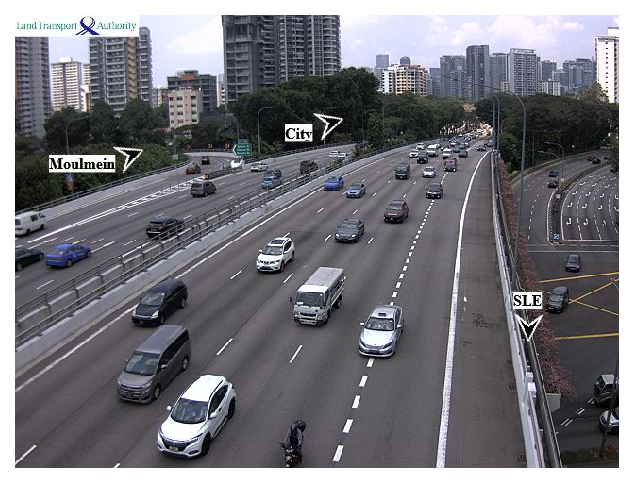

In [1]:
import datetime
import pytz
import requests
import ast
import numpy as np
import urllib 
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

# Provide your location, or request from device's GPS api
my_latitude = 1.323604823
my_longitude = 103.8587802

# Get current date time for Singapore 
tz = pytz.timezone('Asia/Singapore')
d = datetime.datetime.now(tz)

# Format DATA.GOV.SG API
api = 'https://api.data.gov.sg/v1/transport/traffic-images?date_time='+ \
d.strftime("%Y-%m-%d") + "T" + d.strftime("%H") + "%3A" + d.strftime("%M") + "%3A00"

# Read camera data from DATA.GOV.SG
camera_data = ast.literal_eval(requests.get(api).content.decode("utf-8"))["items"][0]["cameras"]

print("DATA.GOV.SG API System Status :", \
      ast.literal_eval(requests.get(api).content.decode("utf-8"))['api_info']['status'], '!')

no_of_cameras = len(camera_data)

# Camera locations 
location = []
for camera_id in np.arange(no_of_cameras):
    location.append(camera_data[camera_id]['location'])
    
camera_latitudes = []
camera_longitudes = []

# Distance of cameras from your location
dist = []
for camera_id in np.arange(no_of_cameras):
    camera_latitudes.append(location[camera_id]['latitude'])
    camera_longitudes.append(location[camera_id]['longitude'])
    dist.append(np.sqrt((camera_latitudes[camera_id]-my_latitude)**2 + \
                        (camera_longitudes[camera_id]-my_longitude)**2))

# Find the camera nearby to your location
for camera_id in np.arange(no_of_cameras):
    if dist[camera_id] == min(dist):
        my_camera_id = camera_id

# Get camera image url
my_camera_url = camera_data[my_camera_id]["image"]
r = requests.get(my_camera_url, stream=True)
if r.status_code == 200:
    with open("camera.jpg", 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f)

print("This camera data last updated :", camera_data[my_camera_id]['timestamp'])

# Show image
image = plt.imread("camera.jpg")
plt.figure(dpi = 150)
plt.imshow(image)
plt.axis('off')
plt.show()